In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.misc import imread

In [2]:
output_notebook()

BokehJS successfully loaded.

In [3]:
tweets = pd.read_csv('tweets.csv')
tweets = tweets.drop(['latitude','longitude'], axis=1)
tweets.shape

(1786, 8)

In [4]:
tweets['time'] = pd.to_datetime(tweets['time'])
tweets.head(10)

,id,text,user,RT,retweetCount,favoriteCount,time,client
0,712729686682435584,RT @jakevdp: Slides from my #PyAstro16 lightni...,Chemisist,True,42,0,2016-03-23 19:56:13,Twitter for Android
1,715550508711215104,"Last week ""Python in Astronomy"" took place in ...",GeertHub,False,0,5,2016-03-31 14:45:10,TweetDeck
2,713050834955677696,Recommended NOT to follow the microsoft TDD re...,abigailStev,False,0,0,2016-03-24 17:12:21,Twitter Web Client
3,713397332742516736,Made a template for doing the gallery examples...,abigailStev,False,0,1,2016-03-25 16:09:13,Twitter Web Client
4,711957447959650308,RT @brettmor: Give us ideas for sprint time la...,IBJIYONGI,True,2,0,2016-03-21 16:47:37,Twitter for iPhone
5,713746986625671169,RT @abigailStev: In Bayesian notation: @exopla...,AscendingNode,True,11,0,2016-03-26 15:18:37,Twitter Web Client
6,714452067880996864,"RT @eteq: A bit late, but anyone interested in...",adam_m_jcbs,True,6,0,2016-03-28 14:00:21,Twitter for Android
7,712326876195397632,RT @stephtdouglas: .@njgoldbaum released his s...,DataExpLab,True,1,0,2016-03-22 17:15:36,TweetDeck
8,712727950370717696,RT @eblur27: I’m definitely stoked on Adam’s s...,for_Content,True,1,0,2016-03-23 19:49:19,RoundTeam
9,715499847428624385,RT @jakevdp: Just learned about conda-forge: h...,CMastication,True,34,0,2016-03-31 11:23:51,Twitter for iPhone


In [51]:
tweetdata = ColumnDataSource(tweets)
p = figure()
p.scatter('favoriteCount', 'retweetCount', source=tweetdata)
p.xaxis.axis_label = 'Favorite Count'
p.yaxis.axis_label = 'Retweet Count'
show(p)

In [6]:
TOOLS = 'pan,box_zoom,resize,wheel_zoom,reset,hover'

p = figure(x_axis_type='datetime', tools=TOOLS)
p.scatter('time', 'retweetCount', source=tweetdata, size=10, alpha=0.6)

hover = p.select(dict(type=HoverTool))
hover.tooltips=[
            ("user","@user"),
            ("text", "@text"),
        ]

p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Retweet Count'
show(p)

In [7]:
tweetdata_noRT = ColumnDataSource(tweets[tweets['RT']==False]) # no retweets

TOOLS = 'pan,box_zoom,resize,wheel_zoom,reset,hover'
p = figure(x_axis_type='datetime', tools=TOOLS)
p.scatter('time', 'retweetCount', source=tweetdata_noRT, size=10, alpha=0.6)

hover = p.select(dict(type=HoverTool))
hover.tooltips=[
            ("user", "@user"),
            ("text", "@text"),
        ]

p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Retweet Count'
show(p)

In [8]:
from bokeh.charts import Bar
p = Bar(tweets, label='client', values='client', agg='count')
show(p)

In [9]:
df = tweets.copy()
df = df.drop(['text','user','RT','retweetCount','time','favoriteCount'], axis=1)
df = df.groupby('client').count()
df = df[df['id']>=30]
df.reset_index(level=0, inplace=True)
df

,client,id
0,Corebird,60
1,TweetDeck,302
2,Twitter Web Client,707
3,Twitter for Android,316
4,Twitter for Mac,39
5,Twitter for iPhone,257


In [10]:
from bokeh.charts import Donut
p = Donut(df, label='client', values='id')
show(p)

In [11]:
df = tweets.copy()
df = df.drop(['text','client','RT','retweetCount','time','favoriteCount'], axis=1)
df = df.groupby('user').count()
df = df.sort_values(by='id', ascending=False).head(10)
df.reset_index(level=0, inplace=True)
df

,user,id
0,abigailStev,230
1,niais,135
2,stephtdouglas,95
3,astronomatty,91
4,brettmor,68
5,StuartMumford,67
6,IBJIYONGI,58
7,eteq,56
8,eblur27,56
9,astrokiwi,51


In [12]:
p = Donut(df, label='user', values='id')
show(p)

(-0.5, 818.5, 818.5, -0.5)

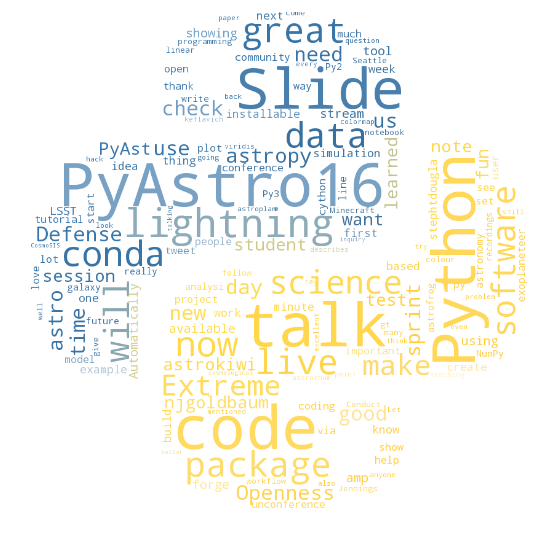

In [71]:
# Join tweets to a single string
words = ' '.join(tweets['text'])

# Remove URLs, 'RT' text, screen names
words_no_urls = ' '.join([word for word in words.split()
                            if 'http' not in word
                              and word != 'RT'
                              and not word.startswith('@')
                   ])

# Add stopwords, if needed
# stopwords = STOPWORDS.copy()
# stopwords.add("RT")

# Load up Python logo as a mask & color image
python_logo = imread('Python-logo-notextpng.png')

# Generate colors
image_colors = ImageColorGenerator(python_logo)

# Generate plot
wc = WordCloud(stopwords=STOPWORDS, mask=python_logo, color_func=image_colors, scale=0.8,
                      max_words=150, background_color='white', random_state=42)
wc.generate(words_no_urls)

size = 9
plt.figure(figsize=(size, size))
plt.imshow(wc)
plt.axis("off")
#plt.savefig('python_cloud.png')